In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# ✅ Corrected columns for first dataset
columns_to_keep_1 = [
    'EHQ_EHQ_Total',
    'ColorVision_CV_Score',
    'APQ_P_APQ_P_CP',
    'APQ_P_APQ_P_INV',
    'APQ_P_APQ_P_OPD',
    'APQ_P_APQ_P_PM',
    'APQ_P_APQ_P_PP',
    'SDQ_SDQ_Conduct_Problems',
    'SDQ_SDQ_Difficulties_Total',
    'SDQ_SDQ_Emotional_Problems',
    'SDQ_SDQ_Externalizing',
    'SDQ_SDQ_Generating_Impact',
    'SDQ_SDQ_Hyperactivity',
    'SDQ_SDQ_Internalizing',
    'SDQ_SDQ_Peer_Problems',
    'SDQ_SDQ_Prosocial',
    'MRI_Track_Age_at_Scan'
]

# ✅ Columns for second dataset
columns_to_keep_2 = [
    'Barratt_Barratt_P1_Edu',
    'Barratt_Barratt_P1_Occ',
    'Barratt_Barratt_P2_Edu',
    'Barratt_Barratt_P2_Occ',
]

# Clean + normalize first dataset
def clean_and_normalize_first_dataset_v1(filepath):
    df = pd.read_excel(filepath)
    df = df[['participant_id'] + columns_to_keep_1]  # include participant_id
    df = df.fillna(df.mean(numeric_only=True))
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df[columns_to_keep_1]), columns=columns_to_keep_1)
    df_scaled['participant_id'] = df['participant_id'].values  # add back participant_id
    return df_scaled

# Clean + normalize second dataset
def clean_and_normalize_second_dataset_v1(filepath):
    df = pd.read_excel(filepath)
    df = df[['participant_id'] + columns_to_keep_2]
    df = df.fillna(df.mean(numeric_only=True))
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df[columns_to_keep_2]), columns=columns_to_keep_2)
    df_scaled['participant_id'] = df['participant_id'].values
    return df_scaled

# Just read third dataset (CSV file)
def read_third_dataset_v1(filepath):
    df = pd.read_csv(filepath)  # NOTE: it's a CSV, not Excel
    return df

# Read solution dataset
def read_solution_dataset_v1(filepath):
    df = pd.read_excel(filepath)
    return df

# 📥 Load all datasets
quant_path = "TRAIN_QUANTITATIVE_METADATA_new.xlsx"
cat_path = "TRAIN_CATEGORICAL_METADATA_new.xlsx"
matrix_path = "TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv"
solution_path = "TRAINING_SOLUTIONS.xlsx"

normalized_df1 = clean_and_normalize_first_dataset_v1(quant_path)
normalized_df2 = clean_and_normalize_second_dataset_v1(cat_path)
third_df = read_third_dataset_v1(matrix_path)
solution_df = read_solution_dataset_v1(solution_path)

# 🔗 Combine quantitative + categorical datasets using participant_id
combined_df = pd.merge(normalized_df1, normalized_df2, on='participant_id', how='inner')

# 🧩 Merge with solution dataset
final_df = pd.merge(combined_df, solution_df, on='participant_id', how='inner')

# 👀 Show final combined data
print(final_df.head())


   EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  APQ_P_APQ_P_INV  \
0       0.818599             -0.200460       -0.619194         0.873262   
1       0.662301              0.277591       -0.619194        -0.983730   
2       0.549071              0.277591       -0.619194        -0.571065   
3       0.683936              0.277591       -0.619194         0.460597   
4      -1.203370              0.277591        3.159524        -0.983730   

   APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  APQ_P_APQ_P_PP  SDQ_SDQ_Conduct_Problems  \
0        -1.195206        0.672599        0.494269                  0.459264   
1         2.121992        2.235436        1.481984                  1.451999   
2         0.011048        1.844727        0.823507                  0.459264   
3        -0.893642        0.672599        0.823507                 -1.029839   
4         1.217302       -0.890238       -0.493446                  1.948367   

   SDQ_SDQ_Difficulties_Total  SDQ_SDQ_Emotional_Problems  ...  \
0 

In [36]:
df_debug = pd.read_excel("TRAIN_QUANTITATIVE_METADATA_new.xlsx")
print(df_debug.columns.tolist())


['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score', 'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP', 'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial', 'MRI_Track_Age_at_Scan']


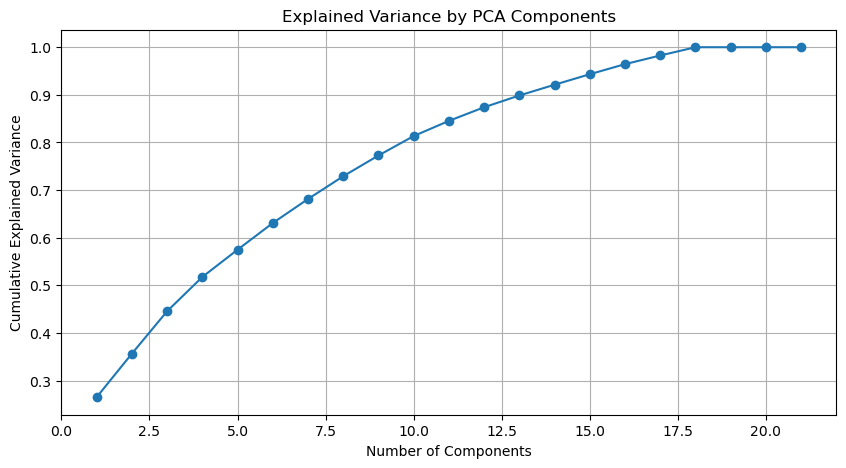

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.835003 -0.861556 -0.157098  1.387423 -1.021975 -1.825126  1.056805   
1  2.558671 -0.898802 -0.666021  0.474734  2.359589 -1.203839  0.354090   
2  4.408662  1.027450  2.402554  2.651938  1.185934  0.465726  0.724979   
3 -2.518406  1.134525  0.989183 -0.366466 -0.617518  0.346683  0.894847   
4  4.783419  1.287166 -0.920512 -2.253225  1.580894  1.643545 -1.466476   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.246215  0.502987  0.981239  0.482490 -0.071343 -0.413739 -0.507990   
1 -1.418951 -0.497959 -0.132397 -1.599195 -0.576568  0.250498  0.099752   
2 -1.302388 -0.336974 -0.052693 -0.482844  0.971611 -0.127416  1.107409   
3 -0.175389  0.079179 -1.457972  0.626092 -1.026785 -0.717484  0.581488   
4 -0.578184 -0.712919  1.047905  0.387235 -0.098158 -1.679757  0.715323   

       PC15      PC16  ADHD_Outcome  Sex_F  
0  0.066196  0.097946             1      0  
1  1.195

In [37]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 🎯 Step 1: Separate features and both targets
features = final_df.drop(columns=['participant_id', 'ADHD_Outcome', 'Sex_F'])
target_adhd = final_df['ADHD_Outcome']
target_sex = final_df['Sex_F']

# 🎯 Step 2: Apply PCA (initial fit to decide how many components to keep)
pca = PCA()
pca_components = pca.fit_transform(features)

# 🎯 Step 3: Plot explained variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# 🎯 Step 4: Reduce to N components (e.g., keep 95% variance)
pca = PCA(n_components=0.95)  # captures 95% of total variance
X_reduced = pca.fit_transform(features)

# 🧠 Optional: Create new DataFrame with reduced features
reduced_df = pd.DataFrame(X_reduced, columns=[f'PC{i+1}' for i in range(X_reduced.shape[1])])
reduced_df['ADHD_Outcome'] = target_adhd.values
reduced_df['Sex_F'] = target_sex.values

# 👀 View the reduced dataset
print(reduced_df.head())





In [40]:
X = reduced_df.drop(columns=['Sex_F','ADHD_Outcome'])
y_adhd = reduced_df['ADHD_Outcome']
y_sex = reduced_df['Sex_F']

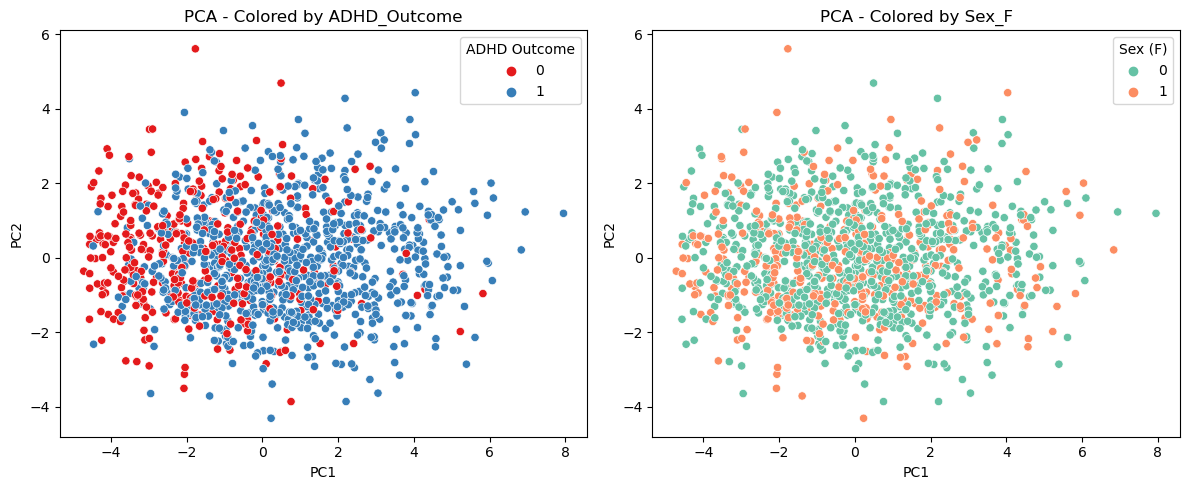

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Just taking first two principal components for 2D plotting
plt.figure(figsize=(12, 5))

# 📌 Plot by ADHD_Outcome
plt.subplot(1, 2, 1)
sns.scatterplot(
    x=reduced_df['PC1'], 
    y=reduced_df['PC2'], 
    hue=reduced_df['ADHD_Outcome'], 
    palette='Set1'
)
plt.title('PCA - Colored by ADHD_Outcome')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='ADHD Outcome')

# 📌 Plot by Sex_F
plt.subplot(1, 2, 2)
sns.scatterplot(
    x=reduced_df['PC1'], 
    y=reduced_df['PC2'], 
    hue=reduced_df['Sex_F'], 
    palette='Set2'
)
plt.title('PCA - Colored by Sex_F')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Sex (F)')

plt.tight_layout()
plt.show()


In [6]:
#Classification on both targets logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 🎯 Split data
X = reduced_df.drop(columns=['ADHD_Outcome', 'Sex_F'])
y_adhd = reduced_df['ADHD_Outcome']
y_sex = reduced_df['Sex_F']

# 🧠 Train-test split
X_train, X_test, y_train_adhd, y_test_adhd = train_test_split(X, y_adhd, test_size=0.2, random_state=42)
_, _, y_train_sex, y_test_sex = train_test_split(X, y_sex, test_size=0.2, random_state=42)

# 🔍 Train classifier for ADHD
clf_adhd = LogisticRegression(max_iter=1000)
clf_adhd.fit(X_train, y_train_adhd)
y_pred_adhd = clf_adhd.predict(X_test)

# 🔍 Train classifier for Sex
clf_sex = LogisticRegression(max_iter=1000)
clf_sex.fit(X_train, y_train_sex)
y_pred_sex = clf_sex.predict(X_test)

# 📊 Evaluation
print("🔷 ADHD_Outcome Classification Report:\n", classification_report(y_test_adhd, y_pred_adhd))
print("🔶 Sex_F Classification Report:\n", classification_report(y_test_sex, y_pred_sex))


🔷 ADHD_Outcome Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.62      0.67        77
           1       0.84      0.89      0.86       166

    accuracy                           0.80       243
   macro avg       0.78      0.75      0.76       243
weighted avg       0.80      0.80      0.80       243

🔶 Sex_F Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82       168
           1       0.59      0.31      0.40        75

    accuracy                           0.72       243
   macro avg       0.67      0.61      0.61       243
weighted avg       0.70      0.72      0.69       243



In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# 🎯 Drop participant_id and target columns to get features
features = final_df.drop(columns=['participant_id', 'ADHD_Outcome', 'Sex_F'])

# 📦 Targets
target_adhd = final_df['ADHD_Outcome']
target_sex = final_df['Sex_F']

# 🔁 Create dictionary of models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC()
}

# 📊 Evaluate models for both targets
for target_name, target in {'ADHD_Outcome': target_adhd, 'Sex_F': target_sex}.items():
    print(f"\n{'='*40}\nEvaluating models for: {target_name}\n{'='*40}")

    # 📤 Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        features, target, test_size=0.2, random_state=42
    )

    # 🔍 Loop through models
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        print(f"\n🔹 Model: {name}")
        print(classification_report(y_test, y_pred))
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")



Evaluating models for: ADHD_Outcome

🔹 Model: Random Forest
              precision    recall  f1-score   support

           0       0.73      0.56      0.63        77
           1       0.82      0.90      0.86       166

    accuracy                           0.79       243
   macro avg       0.77      0.73      0.74       243
weighted avg       0.79      0.79      0.79       243

Accuracy: 0.7942

🔹 Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.73      0.64      0.68        77
           1       0.84      0.89      0.87       166

    accuracy                           0.81       243
   macro avg       0.79      0.76      0.77       243
weighted avg       0.81      0.81      0.81       243

Accuracy: 0.8107

🔹 Model: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.69      0.49      0.58        77
           1       0.79      0.90      0.84       166

    accuracy               


=== Logistic Regression ===
ADHD_Outcome Accuracy: 0.8025


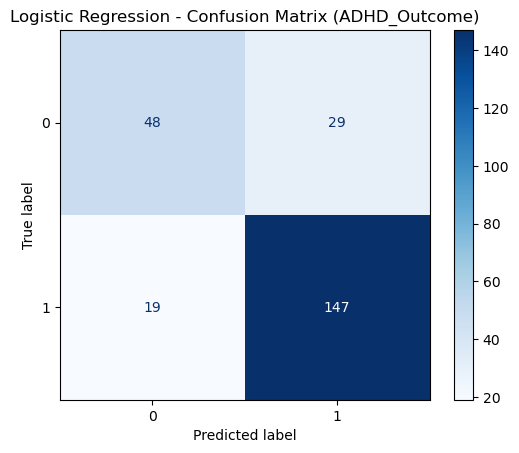

Sex_F Accuracy: 0.7202


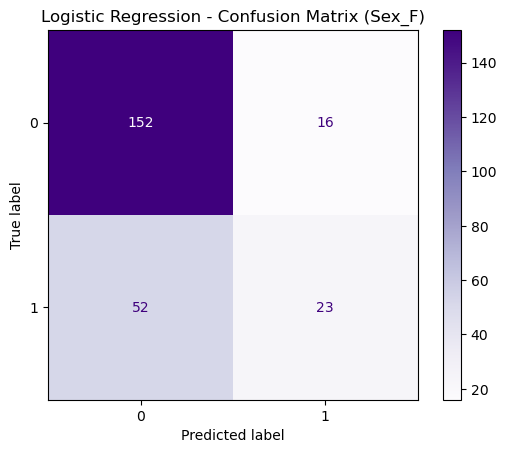


=== Random Forest ===
ADHD_Outcome Accuracy: 0.8066


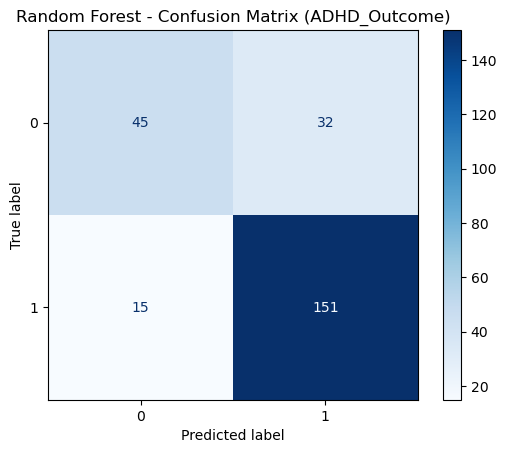

Sex_F Accuracy: 0.6790


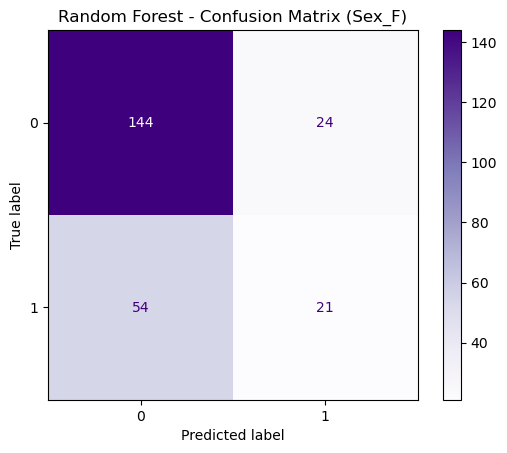


=== SVM ===
ADHD_Outcome Accuracy: 0.8189


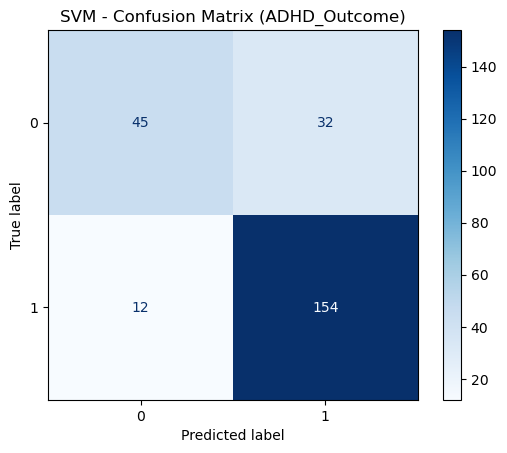

Sex_F Accuracy: 0.6872


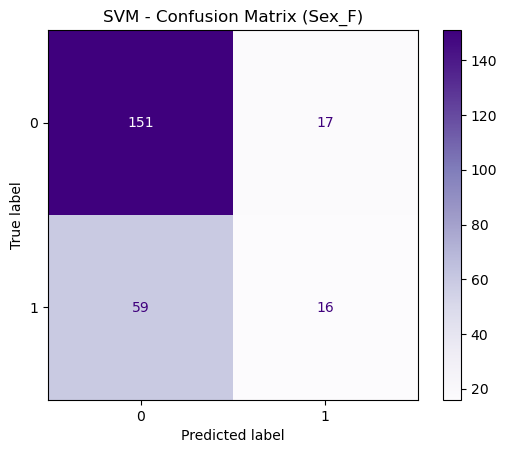


=== KNN ===
ADHD_Outcome Accuracy: 0.8066


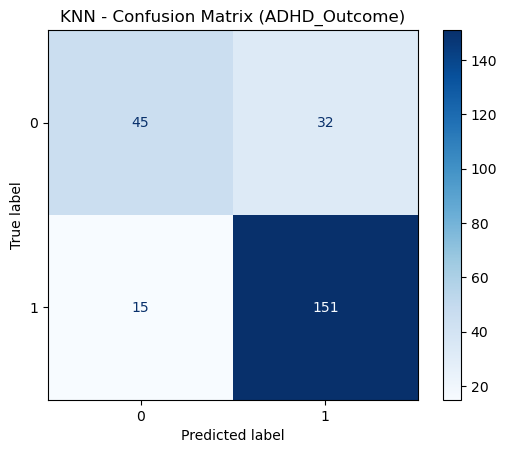

Sex_F Accuracy: 0.6626


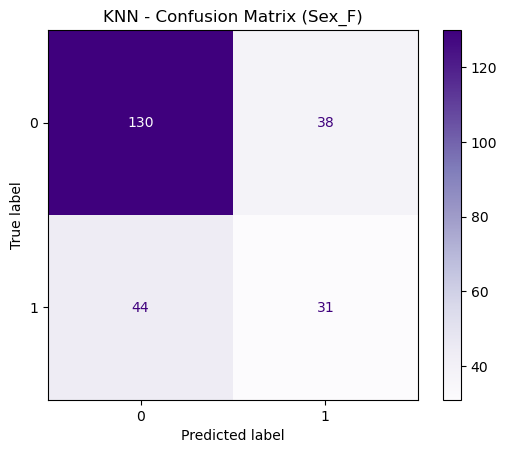

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 🎯 Drop participant_id and targets to get features
features = final_df.drop(columns=['participant_id', 'ADHD_Outcome', 'Sex_F'])

# 📦 Targets
target_adhd = final_df['ADHD_Outcome']
target_sex = final_df['Sex_F']

# ⚙️ PCA (keep 95% variance)
pca = PCA(n_components=0.95)
features_pca = pca.fit_transform(features)

# 📊 Model dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# 📈 Train/Test Split
X_train, X_test, y_train_adhd, y_test_adhd = train_test_split(features_pca, target_adhd, test_size=0.2, random_state=42)
_, _, y_train_sex, y_test_sex = train_test_split(features_pca, target_sex, test_size=0.2, random_state=42)

# 🔁 Loop through models and evaluate both targets
for name, model in models.items():
    print(f"\n=== {name} ===")

    # 🎯 ADHD_Outcome
    model.fit(X_train, y_train_adhd)
    y_pred_adhd = model.predict(X_test)
    acc_adhd = accuracy_score(y_test_adhd, y_pred_adhd)
    print(f"ADHD_Outcome Accuracy: {acc_adhd:.4f}")
    cm_adhd = confusion_matrix(y_test_adhd, y_pred_adhd)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_adhd)
    disp.plot(cmap="Blues")
    plt.title(f'{name} - Confusion Matrix (ADHD_Outcome)')
    plt.show()

    # 🎯 Sex_F
    model.fit(X_train, y_train_sex)
    y_pred_sex = model.predict(X_test)
    acc_sex = accuracy_score(y_test_sex, y_pred_sex)
    print(f"Sex_F Accuracy: {acc_sex:.4f}")
    cm_sex = confusion_matrix(y_test_sex, y_pred_sex)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_sex)
    disp.plot(cmap="Purples")
    plt.title(f'{name} - Confusion Matrix (Sex_F)')
    plt.show()


In [9]:
from sklearn.model_selection import GridSearchCV

# SVM hyperparameter tuning example
svm = SVC()
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)
print("Best parameters for SVM:", grid_search_svm.best_params_)

# Logistic Regression hyperparameter tuning example
log_reg = LogisticRegression()
param_grid_logreg = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

grid_search_logreg = GridSearchCV(log_reg, param_grid_logreg, cv=5, scoring='accuracy')
grid_search_logreg.fit(X_train, y_train)
print("Best parameters for Logistic Regression:", grid_search_logreg.best_params_)


Best parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}


In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Data Splitting
X_train, X_test, y_train_adhd, y_test_adhd = train_test_split(features, target_adhd, test_size=0.2, random_state=42)

# SVM with best parameters
svm_model = SVC(C=1, kernel='rbf', gamma='scale')
svm_model.fit(X_train, y_train_adhd)

# Predictions
svm_pred = svm_model.predict(X_test)

# Results
print(f"SVM Accuracy for ADHD Outcome: {accuracy_score(y_test_adhd, svm_pred) * 100:.2f}%")
print("SVM Confusion Matrix:\n", confusion_matrix(y_test_adhd, svm_pred))
print("SVM Classification Report:\n", classification_report(y_test_adhd, svm_pred))


SVM Accuracy for ADHD Outcome: 79.84%
SVM Confusion Matrix:
 [[ 41  36]
 [ 13 153]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.53      0.63        77
           1       0.81      0.92      0.86       166

    accuracy                           0.80       243
   macro avg       0.78      0.73      0.74       243
weighted avg       0.79      0.80      0.79       243



In [13]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression with best parameters
logreg_model = LogisticRegression(C=0.1, solver='liblinear')
logreg_model.fit(X_train, y_train_sex)

# Predictions
logreg_pred = logreg_model.predict(X_test)

# Results
print(f"Logistic Regression Accuracy for Sex_F: {accuracy_score(y_test_sex, logreg_pred) * 100:.2f}%")
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test_sex, logreg_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test_sex, logreg_pred))



Logistic Regression Accuracy for Sex_F: 72.84%
Logistic Regression Confusion Matrix:
 [[152  16]
 [ 50  25]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82       168
           1       0.61      0.33      0.43        75

    accuracy                           0.73       243
   macro avg       0.68      0.62      0.63       243
weighted avg       0.71      0.73      0.70       243



In [15]:
from sklearn.model_selection import cross_val_score

# Cross-validation for SVM model
svm_scores = cross_val_score(SVC(C=1, kernel='rbf', gamma='scale'), features, target_adhd, cv=5)
print(f"SVM Average Accuracy (CV): {svm_scores.mean() * 100:.2f}%")

# Cross-validation for Logistic Regression model
logreg_scores = cross_val_score(LogisticRegression(C=0.1, solver='liblinear'), features, target_sex, cv=5)
print(f"Logistic Regression Average Accuracy (CV): {logreg_scores.mean() * 100:.2f}%")


SVM Average Accuracy (CV): 78.81%
Logistic Regression Average Accuracy (CV): 67.85%


# Final Model

In [42]:

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Gradient Boosting Model
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# 🎯 Step 2: Cross-validation for Gradient Boosting
gb_cv_scores = cross_val_score(gb, X, y_adhd, cv=5, scoring='accuracy')
print(f"Gradient Boosting Average Accuracy (CV): {np.mean(gb_cv_scores):.2f}%")
# 🎯 Step 4: Train and Evaluate on the Full Dataset (Gradient Boosting)
gb.fit(X, y_adhd)
gb_accuracy = gb.score(X, y_adhd)
print(f"Gradient Boosting Accuracy on Full Dataset: {gb_accuracy * 100:.2f}%")


Gradient Boosting Average Accuracy (CV): 0.79%
Gradient Boosting Accuracy on Full Dataset: 91.59%


In [43]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
#X = final_df.drop(columns=['participant_id', 'Sex_F'])
#y = final_df['Sex_F'] 
# Gradient Boosting Model
gb_sex = GradientBoostingClassifier(n_estimators=100, random_state=42)

# 🎯 Step 2: Cross-validation for Gradient Boosting
gb_cv_scores = cross_val_score(gb_sex, X, y_sex, cv=5, scoring='accuracy')
print(f"Gradient Boosting Average Accuracy (CV): {np.mean(gb_cv_scores):.2f}%")
# 🎯 Step 4: Train and Evaluate on the Full Dataset (Gradient Boosting)
gb_sex.fit(X, y_sex)
gb_accuracy = gb_sex.score(X, y_sex)
print(f"Gradient Boosting Accuracy on Full Dataset: {gb_accuracy * 100:.2f}%")


Gradient Boosting Average Accuracy (CV): 0.63%
Gradient Boosting Accuracy on Full Dataset: 85.74%


In [11]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
X = final_df.drop(columns=['participant_id', 'Sex_F'])
y = final_df['Sex_F'] 
# Gradient Boosting Model
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# 🎯 Step 2: Cross-validation for Gradient Boosting
gb_cv_scores = cross_val_score(gb, X, y, cv=5, scoring='accuracy')
print(f"Gradient Boosting Average Accuracy (CV): {np.mean(gb_cv_scores):.2f}%")
# 🎯 Step 4: Train and Evaluate on the Full Dataset (Gradient Boosting)
gb.fit(X,y)
gb_accuracy = gb.score(X,y)
print(f"Gradient Boosting Accuracy on Full Dataset: {gb_accuracy * 100:.2f}%")

Gradient Boosting Average Accuracy (CV): 0.66%
Gradient Boosting Accuracy on Full Dataset: 82.85%


In [17]:

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Gradient Boosting Model
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# 🎯 Step 1: Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf, features, target_adhd, cv=5, scoring='accuracy')
print(f"Random Forest Average Accuracy (CV): {np.mean(rf_cv_scores):.2f}%")

# 🎯 Step 2: Cross-validation for Gradient Boosting
gb_cv_scores = cross_val_score(gb, features, target_adhd, cv=5, scoring='accuracy')
print(f"Gradient Boosting Average Accuracy (CV): {np.mean(gb_cv_scores):.2f}%")

# 🎯 Step 3: Train and Evaluate on the Full Dataset (Random Forest)
rf.fit(features, target_adhd)
rf_accuracy = rf.score(features, target_adhd)
print(f"Random Forest Accuracy on Full Dataset: {rf_accuracy * 100:.2f}%")

# 🎯 Step 4: Train and Evaluate on the Full Dataset (Gradient Boosting)
gb.fit(features, target_adhd)
gb_accuracy = gb.score(features, target_adhd)
print(f"Gradient Boosting Accuracy on Full Dataset: {gb_accuracy * 100:.2f}%")


Random Forest Average Accuracy (CV): 0.80%
Gradient Boosting Average Accuracy (CV): 0.80%
Random Forest Accuracy on Full Dataset: 100.00%
Gradient Boosting Accuracy on Full Dataset: 88.21%


In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming 'gradient_boosting_model' is your trained Gradient Boosting model and X_test is your test set
y_pred = gradient_boosting_model.predict(X_test)  # Predicting using the Gradient Boosting model

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)  # y_test is the actual labels for the test set
print(f"Accuracy: {accuracy*100:.2f}%")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")


NameError: name 'gradient_boosting_model' is not defined

In [19]:
from sklearn.model_selection import GridSearchCV

# Random Forest Hyperparameter Tuning
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5)
rf_grid_search.fit(features, target_adhd)
print(f"Best Random Forest Parameters: {rf_grid_search.best_params_}")
print(f"Best Random Forest Accuracy: {rf_grid_search.best_score_ * 100:.2f}%")

# Gradient Boosting Hyperparameter Tuning
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

gb_grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_param_grid, cv=5)
gb_grid_search.fit(features, target_adhd)
print(f"Best Gradient Boosting Parameters: {gb_grid_search.best_params_}")
print(f"Best Gradient Boosting Accuracy: {gb_grid_search.best_score_ * 100:.2f}%")


Best Random Forest Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest Accuracy: 80.30%
Best Gradient Boosting Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}
Best Gradient Boosting Accuracy: 79.97%


In [31]:
!pip install xgboost


  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.0-py3-none-win_amd64.whl (150.0 MB)


In [33]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# 🎯 XGBoost Model with Hyperparameter Tuning
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')

# Hyperparameter grid for XGBoost
xgb_param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# GridSearchCV for XGBoost
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
xgb_grid_search.fit(features, target_adhd)

# Best parameters and accuracy
print(f"Best XGBoost Parameters: {xgb_grid_search.best_params_}")
print(f"Best XGBoost Accuracy: {xgb_grid_search.best_score_ * 100:.2f}%")

# Train the best XGBoost model on the full dataset
best_xgb_model = xgb_grid_search.best_estimator_
best_xgb_model.fit(features, target_adhd)

# Accuracy on the full dataset
xgb_accuracy = best_xgb_model.score(features, target_adhd)
print(f"XGBoost Accuracy on Full Dataset: {xgb_accuracy * 100:.2f}%")


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best XGBoost Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
Best XGBoost Accuracy: 80.96%
XGBoost Accuracy on Full Dataset: 84.75%


In [35]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Define base models
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)),
    ('gb', GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=200, random_state=42)),
    ('lr', LogisticRegression(solver='liblinear', C=0.1, random_state=42))
]

# Stacking model with Logistic Regression as final estimator
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

# Fit model and evaluate
stacking_model.fit(features, target_adhd)
stacking_accuracy = stacking_model.score(features, target_adhd)
print(f"Stacking Model Accuracy: {stacking_accuracy * 100:.2f}%")


Stacking Model Accuracy: 87.72%


In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming you are using the best model (e.g., XGBoost, Random Forest, etc.)
# Example for XGBoost (replace with whichever model you are using)

# Make predictions on the test dataset
y_pred_adhd = best_model.predict(X_test)  # X_test is your test feature dataset
y_pred_sex = best_model.predict(X_test_sex)  # Separate predictions for Sex_F target

# Evaluate accuracy
adhd_accuracy = accuracy_score(y_test_adhd, y_pred_adhd)  # y_test_adhd is the test labels for ADHD_Outcome
sex_accuracy = accuracy_score(y_test_sex, y_pred_sex)  # y_test_sex is the test labels for Sex_F

print(f"ADHD Outcome Accuracy: {adhd_accuracy * 100:.2f}%")
print(f"Sex_F Accuracy: {sex_accuracy * 100:.2f}%")

# Confusion Matrix
print("\nConfusion Matrix for ADHD Outcome:")
print(confusion_matrix(y_test_adhd, y_pred_adhd))

print("\nConfusion Matrix for Sex_F:")
print(confusion_matrix(y_test_sex, y_pred_sex))

# Classification Report (for precision, recall, f1-score)
print("\nClassification Report for ADHD Outcome:")
print(classification_report(y_test_adhd, y_pred_adhd))

print("\nClassification Report for Sex_F:")
print(classification_report(y_test_sex, y_pred_sex))


NameError: name 'best_model' is not defined

# Test 

In [45]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# ✅ Corrected columns for first dataset
columns_to_keep_1 = [
    'EHQ_EHQ_Total',
    'ColorVision_CV_Score',
    'APQ_P_APQ_P_CP',
    'APQ_P_APQ_P_INV',
    'APQ_P_APQ_P_OPD',
    'APQ_P_APQ_P_PM',
    'APQ_P_APQ_P_PP',
    'SDQ_SDQ_Conduct_Problems',
    'SDQ_SDQ_Difficulties_Total',
    'SDQ_SDQ_Emotional_Problems',
    'SDQ_SDQ_Externalizing',
    'SDQ_SDQ_Generating_Impact',
    'SDQ_SDQ_Hyperactivity',
    'SDQ_SDQ_Internalizing',
    'SDQ_SDQ_Peer_Problems',
    'SDQ_SDQ_Prosocial',
    'MRI_Track_Age_at_Scan'
]

# ✅ Columns for second dataset
columns_to_keep_2 = [
    'Barratt_Barratt_P1_Edu',
    'Barratt_Barratt_P1_Occ',
    'Barratt_Barratt_P2_Edu',
    'Barratt_Barratt_P2_Occ',
]

# Clean + normalize first dataset
def clean_and_normalize_first_dataset_v1(filepath):
    df = pd.read_excel(filepath)
    df = df[['participant_id'] + columns_to_keep_1]  # include participant_id
    df = df.fillna(df.mean(numeric_only=True))
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df[columns_to_keep_1]), columns=columns_to_keep_1)
    df_scaled['participant_id'] = df['participant_id'].values  # add back participant_id
    return df_scaled

# Clean + normalize second dataset
def clean_and_normalize_second_dataset_v1(filepath):
    df = pd.read_excel(filepath)
    df = df[['participant_id'] + columns_to_keep_2]
    df = df.fillna(df.mean(numeric_only=True))
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df[columns_to_keep_2]), columns=columns_to_keep_2)
    df_scaled['participant_id'] = df['participant_id'].values
    return df_scaled

# Just read third dataset (CSV file)
def read_third_dataset_v1(filepath):
    df = pd.read_csv(filepath)  # NOTE: it's a CSV, not Excel
    return df

# Read solution dataset
def read_solution_dataset_v1(filepath):
    df = pd.read_excel(filepath)
    return df

# 📥 Load all datasets
quant_path = "TEST_QUANTITATIVE_METADATA.xlsx"
cat_path = "TEST_CATEGORICAL.xlsx"
matrix_path = "TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv"


normalized_df1 = clean_and_normalize_first_dataset_v1(quant_path)
normalized_df2 = clean_and_normalize_second_dataset_v1(cat_path)
third_df = read_third_dataset_v1(matrix_path)


# 🔗 Combine quantitative + categorical datasets using participant_id
final_df = pd.merge(normalized_df1, normalized_df2, on='participant_id', how='inner')

# 👀 Show final combined data
print(final_df.head())


   EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  APQ_P_APQ_P_INV  \
0       0.018010              0.388732        2.127974         0.272477   
1       0.560634             -0.635160       -0.408044         0.671191   
2      -0.660271             -0.123214       -0.408044        -0.724307   
3       0.696291             -0.123214       -0.408044         0.272477   
4      -3.102082              0.388732       -0.408044         0.471834   

   APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  APQ_P_APQ_P_PP  SDQ_SDQ_Conduct_Problems  \
0         0.695134       -1.030210        0.367015                  0.058560   
1         0.389360       -0.196814        0.992780                  0.058560   
2        -0.222189       -0.405163        0.054132                 -0.476286   
3         0.083585        0.428233        0.679897                  1.128251   
4         0.695134        0.011535        0.992780                  0.058560   

   SDQ_SDQ_Difficulties_Total  SDQ_SDQ_Emotional_Problems  ...  \
0 

In [46]:
import pandas as pd

# 📌 Step 1: Extract test features (drop participant_id)
X_test_features = final_df.drop(columns=['participant_id']).values

# 🎯 Step 2: Apply same PCA (fitted on training data)
X_test_pca = pca.transform(X_test_features)

# 🔮 Step 3: Predict ADHD_Outcome
y_pred_adhd = gb.predict(X_test_pca)       # model trained on PCA features

# 🔮 Step 4: Predict Sex_F
y_pred_sex = gb_sex.predict(X_test_pca)    # second model trained on PCA features

# 🗃️ Step 5: Combine predictions with participant_id
results_df = pd.DataFrame({
    'participant_id': final_df['participant_id'],
    'ADHD_Outcome': y_pred_adhd,
    'Sex_F': y_pred_sex
})

# 💾 Step 6: Save predictions to CSV
results_df.to_csv("test_prediction1.csv", index=False)
print("✅ Test predictions saved to 'test_prediction.csv'")




✅ Test predictions saved to 'test_prediction.csv'


E:\PythonPackages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
E:\PythonPackages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
E:\PythonPackages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [47]:
results_df

,participant_id,ADHD_Outcome,Sex_F
0,Cfwaf5FX7jWK,1,0
1,vhGrzmvA3Hjq,1,1
2,ULliyEXjy4OV,0,0
3,LZfeAb1xMtql,1,0
4,EnFOUv0YK1RG,1,0
...,...,...,...
299,UadZfjdEg7eG,1,0
300,IUEHiLmQAqCi,1,0
301,cRySmCadYFRO,0,1
302,E3MvDUtJadc5,0,0
